# INTRODUCTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### TRAITEMENT DES DONNÉES  

Dans cette partie, nous éffectuerons toutes les taches de traitement qui faciliteront la compréhension et l'analyse des données que nous disposons.

In [ ]:
# importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importation des données
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv", sep=";")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Après avoir importé les bibliothèques et les données, nous allons maintenant comprendre nos données à travers la reponse au questions suivantes :
- quel est le type données de colonnes?
- y'a t-il des valeurs manquantes?
- les colonnes sont-elles au bon format?
- est-ce que les noms de nos colonnes sont compréhensible ?

In [ ]:
# le type des colonnes de nos données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

en définitif, notre dataframe contient en majorité des colonnes de type *Integer*. nous avons remarqué qu'en dehors de la colonne *Income*, aucune autre colonne n'a de valeurs manquantes. La colonne **Dt_Customer** est au type object au lieu d'etre au type datetime. Comme les colonnes ne sont pas compréhensive, nous allons créer un dictionnaire de données :
- ID = identifiant client
- Year_Birth = date d'anniversaire
- Education = niveau d'étude
- Marital_Status = status marital
- Income = revenu
- Kidhome = nombre de bébés à la maison
- Teenhome = nombre d'adolescents à la maison
- Dt_Customer = date d'inscription du client auprès de l'entreprise
- Recency = nombre de jours depuis le dernier achat
- MntWines = montant dépensé dans les vins
- MntFruits = montant dépensé dans les fruits
- MntMeatProducts = montant dépensé dans les produits viandes
- MntFishProducts = montant dépensé dans les produits poissons
- MntSweetProducts = montant dépensé dans les produits sucrés
- MntGoldProds =  montant dépensé dans les produits en or
- NumDealsPurchases = nombre d'achats effectués avec remise
- NumWebPurchases = nombre d'achats effectués via le site Web de l'entreprise
- NumCatalogPurchases = nombre d'achats effectués via catalogue
- NumStorePurchases = nombre d'achats effectués directement en magasin
- AcceptedCmp3 = 1 si le client a accepté l'offre lors de la 3ème campagne, 0 sinon
- AcceptedCmp4 = 1 si le client a accepté l'offre lors de la 4ème campagne, 0 sinon
- AcceptedCmp5 = 1 si le client a accepté l'offre lors de la 5ème campagne, 0 sinon
- AcceptedCmp1 = 1 si le client a accepté l'offre lors de la 1ère campagne, 0 sinon
- AcceptedCmp2 = 1 si le client a accepté l'offre lors de la 2ème campagne, 0 sinon
- Response (target) = 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon
- Complain = 1 si le client s'est plaint au cours des 2 dernières années

Nous allons convertir la colonne **Dt_costumer** en **datetime**, puis nous extrayons l'**année**. Enfin, nous allons calculer l'age du client au moment de son premier achat.

In [ ]:
# convertir la table Dt_Customer en datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
# extrayons l'année de la table Dt_customer
df['Annee_Inscription'] = df['Dt_Customer'].dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
# calculons l'age du client au moment de sont premier achat
df['Age_Client'] = df['Annee_Inscription'].max() - df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Annee_Inscription,Age_Client
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,2012,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2014,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2013,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,2014,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,2013,47
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,2014,68
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,2014,33
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,2014,58


Nous venons de de transformer la colonne Dt_customer au bon type, puis extrait l'année afin de calculer l'age du client au moment du premir achat. Nous allons maintenant regarder les données statistique des variables numériques

In [ ]:
# statistiques des variables numériques
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Annee_Inscription,Age_Client
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,2013.028125,45.194196
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,18.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,37.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,44.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,55.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,121.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.684554,11.984069


Nous venons de regarder les statistiques des variables numériques. Nous allons tout de suite créer la fonction qui place dans une catégorie chaque client en fonction de sa tranche d'age. Enfin nous allons créer la colonne **catégorie d'age**

In [ ]:
# création de la fonction qui permet de donner la catégorie d'age dans laquelle chaque client se situe en fonction de sa tranche d'age
def categorie_age(age):
    if age < 16 :
        return "Enfant"
    elif 16 <= age <= 24:
        return "Adolescent"
    elif 25 <= age <= 64 :
        return "Adulte"
    else :
        return "Vieux"


In [ ]:
# creation de la colonne tranche d'age à partir de la fonction catégorie d'age
df['Catégorie_Age'] = df['Age_Client'].apply(categorie_age)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Annee_Inscription,Age_Client,Catégorie_Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,2012,57,Adulte
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2014,60,Adulte
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2013,49,Adulte
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2014,30,Adulte
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2014,33,Adulte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,2013,47,Adulte
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,2014,68,Vieux
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,2014,33,Adulte
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,2014,58,Adulte


### Question 1 : Quel est la distribution des données du **revenu**, du **niveau d'éducation** et le **statut marital**.

#### 1-1 : Distribution de la variable Income

<Axes: ylabel='Income'>

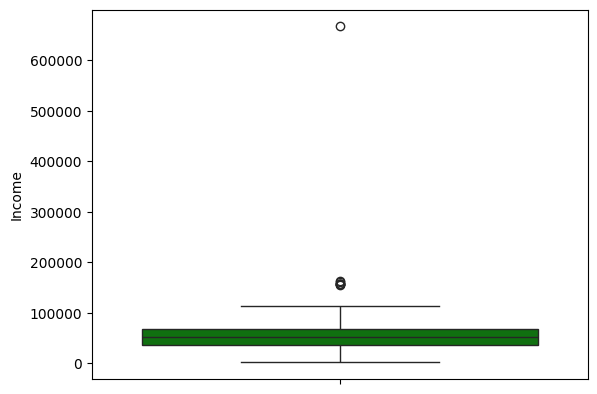

In [ ]:
# la distribution de la variable revenu (Income)
sns.boxplot(y=df['Income'], color='green')

Ce boxplot (boîte à moustache) nous montre que le revenu moyen est entre **50000** et **54000** l'année. Cependant, il existe quelques valeurs extrêmes.

#### 1-2 : Distribution de la variable Catégorie_Age

In [ ]:
df['Catégorie_Age'].value_counts()

,count
Catégorie_Age,
Adulte,2069
Vieux,110
Adolescent,61


les **Adultes** représentent plus de **95%** de la clientèle.

#### 1-3 : Distribution de la variable education

In [ ]:
# distribution de la variable education
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


Les personnes ayant un niveau **Graduation** représentent à eux seuls plus de la moitié des client enregistrés dans le dataset. ce qui correspont à **1127** sur un total de **2240** clients.

#### 1-4 : Distribution de la variable statut marital

In [ ]:
# distribution de la variable Marital_Status
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


Les **mariés**, **Together**, **Single** sont respectivement les 3 statuts les plus représentés. Cependant, **Absurd** et **YOLO** sont les moins représentés avec juste 2 occurences de chaque.

### Question 2 : la relation entre le **revenu** et les caractéristiques démographique(le **statut marital** et l'**age**)

### 2-1: relation entre le **revenu** et l'**éducation**.

In [ ]:
# suppression des valeurs manquantes dans la colonne "Income"
df = df.dropna(subset=['Income'])

In [ ]:
# calcul de revenu moyen en fonction des différentes niveau d'éducation
mean_Income_Education = df.groupby(['Education'])['Income'].mean().round(2)
mean_Income_Education

,Income
Education,
2n Cycle,47633.19
Basic,20306.26
Graduation,52720.37
Master,52917.53
PhD,56145.31


Le salaire moyen par niveau d'étude le plus bas  est de **20306.26€**, il est détenu par les personnes ayant un niveau d'étude **Basic**. Alors que ceux ayant un niveau d'étude **PhD** ont le salaire moyen le plus élévé(**56145.31€**).


### 2-2: relation entre le **revenu** et le **statut marital**.

In [ ]:
# calcul du revenu moyen en fonction des différentes statuts maritals
mean_Income_marital_statut = df.groupby(['Marital_Status'])['Income'].mean().round(2)
mean_Income_marital_statut

,Income
Marital_Status,
Absurd,72365.50
Alone,43789.00
Divorced,52834.23
Married,51724.98
Single,50995.35
Together,53245.53
Widow,56481.55
YOLO,48432.00


On remarque que la plupart des salaire moyen selon le statut marital sont entre **50000€** et **57000€**.

### 2-3: relation entre le **revenu** et la **catégorie d'age**.

In [ ]:
# calcul du revenu moyen en fonction des différentes catégories d'age
mean_Income_Tranche_age = df.groupby(['Catégorie_Age'])['Income'].mean().round(2)
mean_Income_Tranche_age

,Income
Catégorie_Age,
Adolescent,52877.00
Adulte,51606.71
Vieux,63918.17


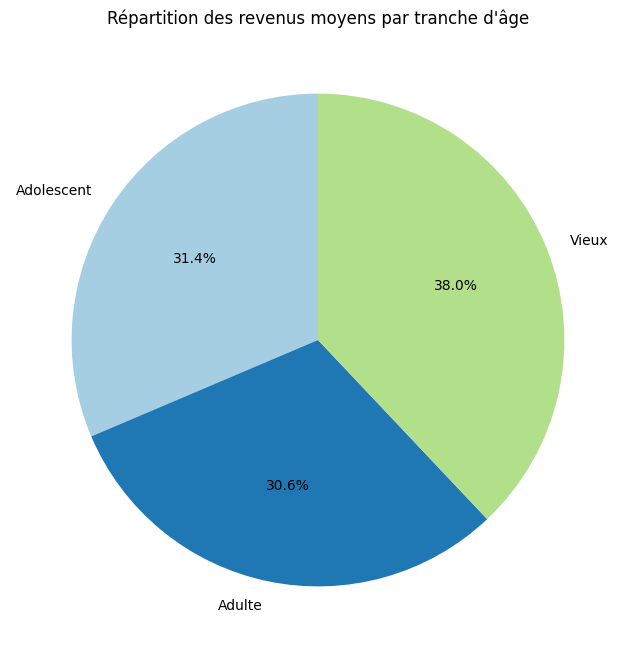

In [ ]:
# créer les étiquettes en utilisant l'index
labels = mean_Income_Tranche_age.index
# utiliser la valeur des étiquettes comme données
data = mean_Income_Tranche_age.values
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Répartition des revenus moyens par tranche d'âge")
plt.show()

Les **vieux** ont le salaire moyen le plus élévé. Ce salaire moyen est de  **64713.49€**

### Question 3 : Quels sont les principales catégories de produits sur lesquelles les clients dépensent le plus? Comment les dépenses varient-elles selon les catégories ?

#### 3-1 : Quels sont les principales catégories de produits sur lesquelles les clients dépensent le plus

In [ ]:
depense_produit = df[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntWines', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values()
depense_produit


,0
MntFruits,58405
MntSweetProducts,59896
MntFishProducts,83405
MntGoldProds,97427
MntMeatProducts,370063
MntWines,676083


les principes catégories de produits les plus vendues sont :
- les produit **vins** avec **680 816€**
- les produits **viandés** avec **373 968€**
- les produits en **or** avec **98 609€**
- les produits **poisson** avec **84 057€**
- les produit **sucrés** avec **60 621€**
- les produit **fruit** avec **58405€**

#### 3-2 : Comment les dépenses varient-elles selon les catégories

##### 3-2-1 La variation des dépenses en fonction de la catégorie d'âge

In [ ]:
# calcul des depenses moyennes en fonction de la catégorie d'age
depense_par_categorie = df.groupby('Catégorie_Age')[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntWines', 'MntSweetProducts', 'MntGoldProds']
].mean().round(2)
depense_par_categorie

,MntFruits,MntMeatProducts,MntFishProducts,MntWines,MntSweetProducts,MntGoldProds
Catégorie_Age,,,,,,
Adolescent,38.69,291.02,53.20,333.10,35.43,59.15
Adulte,25.51,158.58,36.30,294.37,26.22,43.36
Vieux,35.41,255.56,54.07,490.71,37.46,46.75


**Vieux** dépensent significativement plus pour le **vin** et les **produits carnés**. Les **Adolescents** beaucoup dans les produits **fruitiers**, **carnés**, **halieutiques** et en **or**. **Adultes** ont les dépenses moyennes inférieures dans presque toutes les catégories.

##### 3-2-2 La variation des dépenses en fonction de l'Education

In [ ]:
# calcul des depenses moyennes en fonction de l'éducation
depense_par_Education = df.groupby('Education')[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntWines', 'MntSweetProducts', 'MntGoldProds']
].mean().round(2)
depense_par_Education

,MntFruits,MntMeatProducts,MntFishProducts,MntWines,MntSweetProducts,MntGoldProds
Education,,,,,,
2n Cycle,29.36,135.08,48.04,200.84,34.72,46.88
Basic,11.11,11.44,17.06,7.24,12.11,22.83
Graduation,30.86,180.39,43.42,285.05,31.29,50.68
Master,21.38,162.92,31.49,332.98,20.81,40.19
PhD,20.15,169.74,26.88,407.22,20.35,32.40


Le niveau **Graduation**, a le mellieur pagné moyen en **fruits**, **viandes** et **or**. le niveau **2n Cycle** a le meilleur pagné moyen sur les produits comme le **poisson** et les **produits sucrés**. Enfin, le niveau **PhD** a le meilleur pagné moyen en **vin**. On constate que les niveaux **basic** et **master** ont les dépenses moyennes inférieures dans presque toutes les catégories.

In [ ]:
depense_par_Marital_Status = df.groupby('Marital_Status')[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntWines', 'MntSweetProducts', 'MntGoldProds']
].mean().round(2)
depense_par_Marital_Status

,MntFruits,MntMeatProducts,MntFishProducts,MntWines,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Absurd,84.50,312.50,205.50,355.50,30.50,204.00
Alone,4.00,26.33,7.67,184.67,7.00,27.00
Divorced,27.43,150.21,35.04,324.84,26.82,46.29
Married,25.65,160.90,35.47,299.86,26.75,42.85
Single,27.26,184.85,38.77,291.33,27.07,43.31
Together,25.50,166.45,39.06,308.40,26.23,43.20
Widow,31.87,185.33,49.91,367.13,37.87,55.86
YOLO,3.00,50.00,4.00,322.00,3.00,42.00


Les **absurd** ont le meilleur pagné moyen en produits comme les **fruits**, les **viandes**, les **poissons**(4 fois plus que les autres) et les produits en **or**. Cependant, les **yolos** ont le pire pagné moyen des **ces mêmes produits**. Les **veufs** consomment plus le **vin**, les **produits sucrés** avec un pagné moyen respectif de **367,13€**  et **37,87€**. les **mariés**; bien qu'étant les plus nombreux, ne sont premier dans aucun produit.

### Question 4 : Y a-t-il une relation entre le revenu et les dépenses totales ou les dépenses dans des catégories spécifiques

In [ ]:
# création de la colonne des dépenses totales
df['Spending'] = df[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntWines', 'MntSweetProducts', 'MntGoldProds']].sum(axis = 1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Annee_Inscription,Age_Client,Catégorie_Age,Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,2012,57,Adulte,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,2014,60,Adulte,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,2013,49,Adulte,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,2014,30,Adulte,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,2014,33,Adulte,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,2013,47,Adulte,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,2014,68,Vieux,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,2014,33,Adulte,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,2014,58,Adulte,843


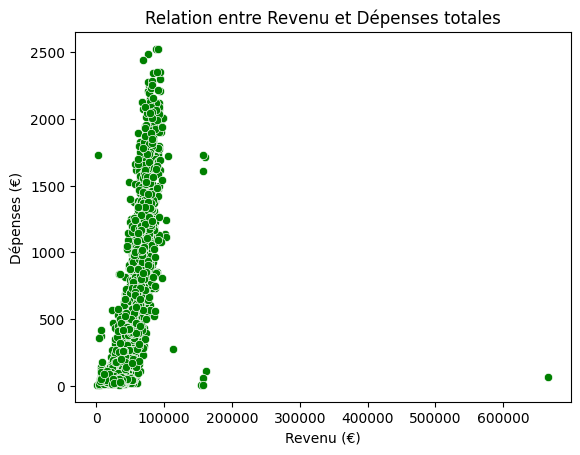

In [ ]:
# diagramme de dispersion pour voir la relation entre le revenu et les dépenses totale
sns.scatterplot(x='Income', y='Spending', data=df, color='green')
plt.title('Relation entre Revenu et Dépenses totales')
plt.xlabel('Revenu (€)')
plt.ylabel('Dépenses (€)')
plt.show()

Il n'y a pas de corrélation entre le revenu et les dépenses totales

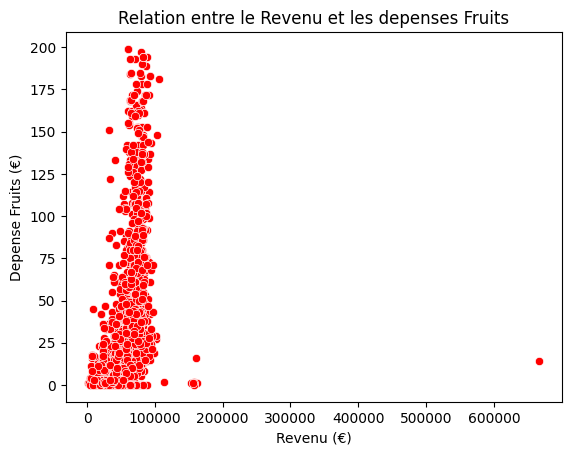

In [ ]:
# diagramme de dispersion pour voir la relation entre le revenu et les dépenses dans les fruits
sns.scatterplot(x='Income', y='MntFruits', data= df, color= 'red' )
plt.title('Relation entre le Revenu et les depenses Fruits')
plt.xlabel('Revenu (€)')
plt.ylabel('Depense Fruits (€)')
plt.show()

Il n'y a pas de corrélation entre le revenu et les dépenses dans les fruits.

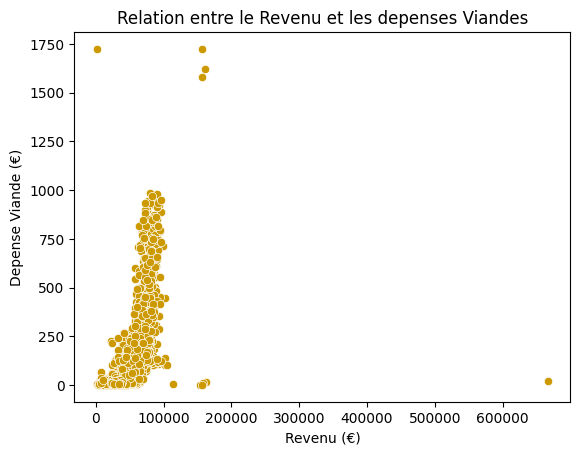

In [ ]:
# diagramme de dispersion pour voir la relation entre le revenu et les dépenses dansla viande
sns.scatterplot(x='Income', y='MntMeatProducts', data= df, color= '#CC9900' )
plt.title('Relation entre le Revenu et les depenses Viandes')
plt.xlabel('Revenu (€)')
plt.ylabel('Depense Viande (€)')
plt.show()

Il n'y a pas de corrélation entre le revenu et les dépenses dans la viande.

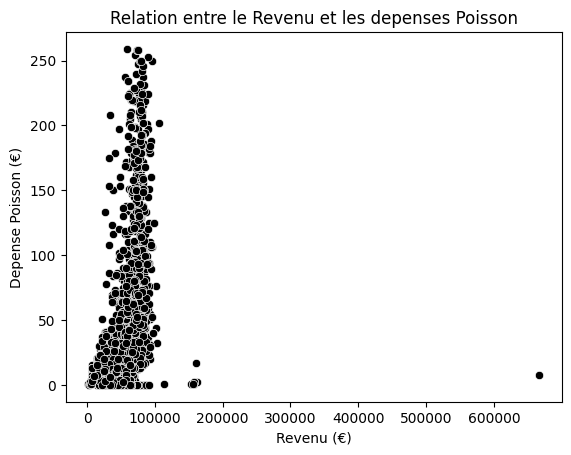

In [ ]:
# diagramme de dispersion pour voir la relation entre le revenu et les dépenses dans le poisson
sns.scatterplot(x='Income', y='MntFishProducts', data= df, color= 'black' )
plt.title('Relation entre le Revenu et les depenses Poisson')
plt.xlabel('Revenu (€)')
plt.ylabel('Depense Poisson (€)')
plt.show()

Il n'y a pas de corrélation entre le revenu et les dépenses dans le poisson.

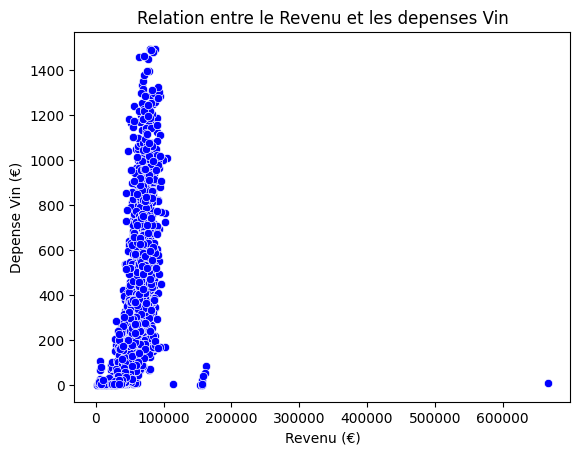

In [ ]:
# diagramme de dispersion pour voir la relation entre le revenu et les dépenses dans le vin
sns.scatterplot(x='Income', y='MntWines', data= df, color= 'blue' )
plt.title('Relation entre le Revenu et les depenses Vin')
plt.xlabel('Revenu (€)')
plt.ylabel('Depense Vin (€)')
plt.show()

Il n'y a pas de corrélation entre le revenu et les dépenses dans le vin.

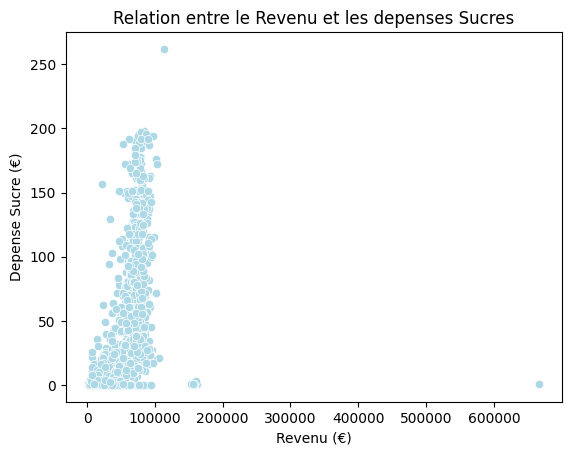

In [ ]:
# diagramme de dispersion pour voir la relation entre le revenu et les dépenses dans le sucre
sns.scatterplot(x='Income', y='MntSweetProducts', data= df, color= 'lightblue' )
plt.title('Relation entre le Revenu et les depenses Sucres')
plt.xlabel('Revenu (€)')
plt.ylabel('Depense Sucre (€)')
plt.show()

Il n'y a pas de corrélation entre le revenu et les dépenses dans les produits sucré.

### Question 5 : Quelle est la proportion des achats effectués par différents canaux ?

In [ ]:
nbre_achat_via_canaux = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values()
nbre_achat_via_canaux

,0
NumDealsPurchases,5149
NumCatalogPurchases,5919
NumWebPurchases,9053
NumStorePurchases,12855


Les 2 canaux les plus utilisés pour éffectuer les achats sont le **magasin** avec **12855** achats et le **site web** avec **9053** achats

### Question 6 : Quelles campagnes marketing ont les taux d'acceptation les plus élevés, et quelles sont les caractéristiques communes des clients qui les ont acceptées ?

#### 6-1 : Quelles campagnes marketing ont les taux d'acceptation les plus élevés?


In [ ]:
campagne1 = (df['AcceptedCmp1'] == 1).count()
campagne2 = (df['AcceptedCmp2'] == 1).count()
campagne3 = (df['AcceptedCmp3'] == 1).count()
campagne4 = (df['AcceptedCmp4'] == 1).count()
campagne5 = (df['AcceptedCmp5'] == 1).count()
print(campagne1, campagne2, campagne3, campagne4, campagne5)

2216 2216 2216 2216 2216


Toutes les 5 campagnes ont le même taux d'acceptation, soit **98,92%**

#### 6-2 : Quelles sont les caractéristiques communes des clients qui les ont acceptées ?

In [ ]:
# Colonnes à considérer pour les caractéristiques
caractéristiques = ['Catégorie_Age', 'Income', 'Marital_Status', 'Education', 'Recency', 'NumWebVisitsMonth']

# Colonnes des campagnes
campagnes = [f'AcceptedCmp{i}' for i in range(1, 6)]

# Dictionnaire pour stocker les résultats
results = {}

# Analyser chaque campagne
for campaign in campagnes:
    # Filtrer les clients ayant accepté la campagne
    accepté = df[df[campaign] == 1]

    # Dictionnaire pour stocker les groupes communs
    groupe_commun = {}

    # Générer toutes les combinaisons de trois caractéristiques
    for combinaison in combinations(caractéristiques, 3):
        # Obtenir la combinaison des colonnes
        groupe = accepté[list(combinaison)]

        # Transformer les lignes en tuples pour compter les occurrences
        groupe_tuples = groupe.apply(tuple, axis=1)

        # Identifier la combinaison la plus fréquente
        if not groupe_tuples.empty:  # Vérifie qu'il y a des données
            combinaison_commune = groupe_tuples.value_counts().idxmax()  # Valeurs les plus fréquentes
            count = groupe_tuples.value_counts().max()  # Fréquence
            groupe_commun[combinaison] = (combinaison_commune, count)

    # Identifier le groupe de 3 caractéristiques le plus fréquent
    if groupe_commun:  # Vérifie que le dictionnaire n'est pas vide
        most_common = max(groupe_commun.items(), key=lambda x: x[1][1])
        results[campaign] = {
            'caractéristiques': most_common[0],
            'values': most_common[1][0],
            'count': most_common[1][1]
        }

# Résumé des résultats
for campaign, data in results.items():
    print(f"Campagne: {campaign}")
    print(f"Caractéristiques les plus courantes: {data['caractéristiques']}")
    print(f"Values: {data['values']}")
    print(f"Count: {data['count']}")
    print("-" * 50)


Campagne: AcceptedCmp1
Caractéristiques les plus courantes: ('Catégorie_Age', 'Marital_Status', 'Education')
Values: ('Adulte', 'Married', 'Graduation')
Count: 29
--------------------------------------------------
Campagne: AcceptedCmp2
Caractéristiques les plus courantes: ('Catégorie_Age', 'Marital_Status', 'Education')
Values: ('Adulte', 'Together', 'Graduation')
Count: 6
--------------------------------------------------
Campagne: AcceptedCmp3
Caractéristiques les plus courantes: ('Catégorie_Age', 'Marital_Status', 'Education')
Values: ('Adulte', 'Married', 'Graduation')
Count: 27
--------------------------------------------------
Campagne: AcceptedCmp4
Caractéristiques les plus courantes: ('Catégorie_Age', 'Marital_Status', 'Education')
Values: ('Adulte', 'Married', 'Graduation')
Count: 27
--------------------------------------------------
Campagne: AcceptedCmp5
Caractéristiques les plus courantes: ('Catégorie_Age', 'Marital_Status', 'Education')
Values: ('Adulte', 'Married', 'Grad

### Question 7 : Les clients ayant une récence élevée (dernier achat plus proche du présent) sont-ils plus susceptibles d'accepter les campagnes ?

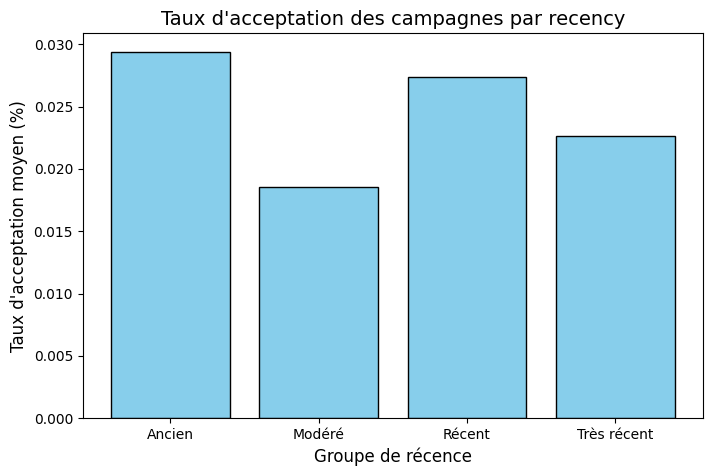

In [ ]:
# Créer une colonne indiquant si une personne a accepté au moins 3 campagnes
df['AccepteAuMoins3Campagne'] = (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) >= 3).astype(int)

# Créer la colonne 'Categorie_Recency' pour diviser la colonne Recency en 4 catégories
def cat_recency(cr):
    if cr <= 14:
        return 'Très récent'
    elif 15 <= cr <= 30:
        return 'Récent'
    elif 31 <= cr <= 60:
        return 'Modéré'
    else:
        return 'Ancien'

df['Categorie_Recency'] = df['Recency'].apply(cat_recency)

# Calculer le taux d'acceptation moyen par groupe de récence
acceptance_stats = (df.groupby('Categorie_Recency')['AccepteAuMoins3Campagne']
    .mean()
    .reset_index(name='Acceptance_Percentage'))

# Visualiser la relation
plt.figure(figsize=(8, 5))
plt.bar(acceptance_stats['Categorie_Recency'],acceptance_stats['Acceptance_Percentage'],color='skyblue',edgecolor='black')
plt.title("Taux d'acceptation des campagnes par recency", fontsize=14)
plt.xlabel("Groupe de récence", fontsize=12)
plt.ylabel("Taux d'acceptation moyen (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Les **anciens clients** sont **plus susceptibles** accepter une campagne, alors que les **client modérés** sont **moins susceptibles** d'accepter une campagne.

### Question 8 : Quelles sont les caractéristiques des clients les plus fidèles (par exemple, ceux ayant la fréquence d'achat ou les dépenses totales les plus élevées) ?

In [ ]:
# créer la colonne qui somme toutes les transaction de chaque client.
df['Frequence_Achat']= df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [ ]:
# Créer la fonction qui permettra de créer la colonne catégorie_client
def cat_client(cc):
    if 0 <= cc <= 8 :
        return 'Client dormant'
    elif 9 <= cc <= 15 :
        return 'Client à risque'
    elif 16 <= cc <= 21 :
       return 'Client regulier '
    else:
        return 'Client fidèle'




In [ ]:
# créer la colonne Categorie_client à partir de la fonction cat_client
df['Categorie_client']= df['Frequence_Achat'].apply(cat_client)

In [ ]:
# Filtrer les clients fidèles
clients_fideles = df[df['Categorie_client'] == 'Client fidèle']

In [ ]:
# Sélectionner les colonnes souhaitées
df_client = clients_fideles[['Recency', 'Frequence_Achat', 'Spending','Categorie_client']]
df_client

,Recency,Frequence_Achat,Spending,Categorie_client
0,58,25,1617,Client fidèle
5,16,22,716,Client fidèle
15,23,26,1315,Client fidèle
18,91,26,1782,Client fidèle
21,42,43,1730,Client fidèle
...,...,...,...,...
2225,55,22,586,Client fidèle
2226,87,26,653,Client fidèle
2231,71,27,1049,Client fidèle
2236,56,22,444,Client fidèle


In [ ]:
# calculer la dépense moyenne de tous les clients fidèles
df[df['Categorie_client'] == 'Client fidèle']['Spending'].mean().round(0)


1157.0

In [ ]:
# calculer la fréquence moyenne de tous les clients fidèles
df[df['Categorie_client'] == 'Client fidèle']['Frequence_Achat'].mean().round(0)


25.0

Les caractéristiques des clients fidèles est qu'ils ont une **fréquence d'achat élévées**. ils éffectuent en moyenne **25 achats**. Ils **dépensent beaucoup**, avec une dépense moyenne de **1157€**.

### Question 9 : Comment les habitudes de dépenses diffèrent-elles entre les clients ayant accepté les campagnes et ceux qui ne les ont pas acceptées ?

Habitudes de dépenses des clients fidèles

In [ ]:
# Colonnes à considérer pour les caractéristiques
caractéristiques = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntWines', 'MntSweetProducts', 'MntGoldProds']

# Filtrer les clients fidèles
clients_fideles = df[df['Categorie_client'] == 'Client fidèle']

# Dictionnaire pour stocker les résultats
groupe_commun = {}

# Générer toutes les combinaisons de 3 colonnes
for combinaison in combinations(caractéristiques, 3):
    # Extraire les données pour chaque combinaison
    groupe = clients_fideles[list(combinaison)]

    # Compter les occurrences des valeurs
    groupe_tuples = groupe.apply(tuple, axis=1)
    common_combination = groupe_tuples.value_counts().idxmax()  # La combinaison la plus fréquente
    count = groupe_tuples.value_counts().max()  # Nombre d'occurrences de cette combinaison

    # Stocker les résultats dans un dictionnaire
    groupe_commun[combinaison] = (common_combination, count)

# Identifier la combinaison la plus fréquente
most_common = max(groupe_commun.items(), key=lambda x: x[1][1])

# Résultats finaux
results = {
    'Caractéristiques': most_common[0],
    'Valeurs': most_common[1][0],
    'Occurrences': most_common[1][1]
}

# Afficher les résultats
print("Caractéristiques les plus fréquentes des clients fidèles :")
print(f"Caractéristiques : {results['Caractéristiques']}")
print(f"Valeurs correspondantes : {results['Valeurs']}")
print(f"Nombre d'occurrences : {results['Occurrences']}")


Caractéristiques les plus fréquentes des clients fidèles :
Caractéristiques : ('MntFruits', 'MntFishProducts', 'MntSweetProducts')
Valeurs correspondantes : (0, 0, 0)
Nombre d'occurrences : 17


les clients fidèles depensent habituellement dans les produits **vin, poisson et sucre**


In [ ]:
# Créer une colonne indiquant si une personne n'a accepté aucune une campagne
df['AccepteAucuneCampagne'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) == 0


In [ ]:
df['AccepteAuMoins3Campagne'] = df['AccepteAuMoins3Campagne'].astype(bool)


In [ ]:
# calculer la moyenne du SpendingScore des clients ayant acceptés au moins trois campagnes
depenses_total_acceptes = df[df['AccepteAuMoins3Campagne']]['Spending'].mean().round(0)
print(f"La moyenne du \033[1mSpending\033[0m des clients ayant accepté au moins trois campagnes : \033[1m{depenses_total_acceptes}\033[0m")


La moyenne du Spending des clients ayant accepté au moins trois campagnes : 1665.0


In [ ]:
# calculer la moyenne du SpendingScore des clients ayant refusés toutes les campagnes
depenses_total_refuse = df[df['AccepteAucuneCampagne']]['Spending'].mean().round(0)
print(f"La moyenne du \033[1mSpending\033[0m des clients ayant refusé toutes les campagnes :\033[1m{depenses_total_refuse}\033[0m")


La moyenne du Spending des clients ayant refusé toutes les campagnes :480.0


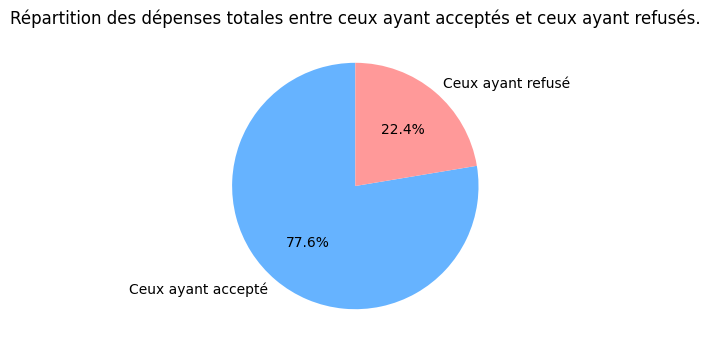

In [ ]:
# diagramme circulaire des dépenses totales entre ceux ayant acceptés et ceux ayant refusés
data= [depenses_total_acceptes, depenses_total_refuse]
labels= ['Ceux ayant accepté', 'Ceux ayant refusé']
plt.figure(figsize=(4, 4))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Répartition des dépenses totales entre ceux ayant acceptés et ceux ayant refusés.")
plt.show()

Ce graphique nous montre que **les campagnes influencent les habitudes de dépense**, car le pourcentage de la moyenne des dépenses totales est des **clients ayant acceptés les campagnes est presque 3 fois supérieurs à celui de ceux ayant refusés les campagnes**.

In [ ]:
# calculer la moyenne du RecencyScore des clients ayant acceptés au moins 3 campagnes
Recency_total_acceptes = df[df['AccepteAuMoins3Campagne']]['Recency'].mean().round(0)
print(f"La moyenne du \033[1mRecency\033[0m des clients ayant accepté au moins trois campagnes : \033[1m{Recency_total_acceptes}\033[0m")


La moyenne du Recency des clients ayant accepté au moins trois campagnes : 50.0


In [ ]:
# calculer la moyenne des RecencyScore totals des clients ayant refusés les toutes campagnes
Recency_total_refuses = df[df['AccepteAucuneCampagne']]['Recency'].mean().round(0)
print(f"La moyenne du \033[1mRecency\033[0m des clients ayant refusés toutes les campagnes : \033[1m{Recency_total_refuses}\033[0m")


La moyenne du Recency des clients ayant refusés toutes les campagnes : 49.0


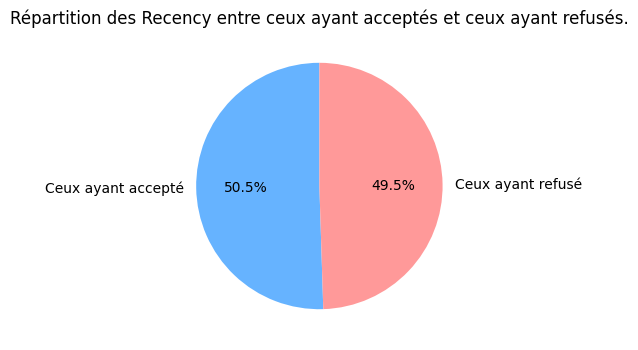

In [ ]:
# diagramme circulaire des RecencyScore entre ceux ayant acceptés et ceux ayant refusés
data= [Recency_total_acceptes, Recency_total_refuses]
labels= ['Ceux ayant accepté', 'Ceux ayant refusé']
plt.figure(figsize=(4, 4))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Répartition des Recency entre ceux ayant acceptés et ceux ayant refusés.")
plt.show()

Ce graphique nous montre que **ceux ayant acceptés** est **très légerement supérieur** à **ceux ayant refusés** avec une **différence de 0,5%**. Ce qui nous montrent que les campagnes **affectent très faiblement** le **Recency**.

# CONCLUSION

L'analyse de ce fichier client nous apprend que la structure compte 2240 clients. cette clientèle est majoritairement composée de **mariés**, **together** et **single**. ils représentent **90%** de la clientèle.

Voici quelques informations clés que notre analyse nous permi de decouvrir:

- La majorité de leurs clients n'ont pas un niveau d'étude elevé car la plus part ont un niveau **graduation**. Cependant, certains ont le **master** et le **PhD**.

- La structure commercialise 6 catégories produits à savoir: les produits sucrés, carnés, halieutiques, frutiers, Or et vin. Cette structure fait un chiffre d'affaire de **1 356 476€**. Le **vin** et la **viande** sont les produits avec le chiffre d'affaire le plus élévé, représentant respectivement **50%** et **28%** des ventes.

- L'entreprise utilise 4 moyens pour écouler ses marchandises notamment : le magasin, le site web, le catalogue et les reductions. le **magasin** et le **site web** sont les canaux les utilisé avec respectivement **39%** et **27%** des ventes.

- Nous avons constaté que ceux qui depensent le plus ne sont pas forcement ceux qui ont les revenus les plus élévés.

- Sur les 5 campagnes effectués, nous avons remarqué que les **anciens** clients avaient un **taux d'acceptation de plus de 25 %**. Autrement dit, les personnes qui mettent beaucoup de temps avant de faire un achat sont plus suceptibles d'accepter un campagne.

- L'entreprise possède **414 clients fidèles** qui se caractérisent par une fréquence d'achat élévées. Ils éffectuent en moyenne **25 achats** et dépensent moyenne de **1157€**.

- nous avons découvert que une bonne partie nos clients fidèles achetaient habituellement ensembles les produits **vin**, **poisson** et **sucre**

- Le pourcentage de la moyenne des dépenses totales est des clients ayant acceptés les campagnes est **plus de 3 fois supérieurs** à celui de ceux ayant refusés les campagnes, ce qui signifie que les **campagnes** **affectent** les habitudes de **dépenses**, alors les campagnes **affectent très faiblement** le **recency**




